## Description:
    In this notebook I tried to learn Cross-Validation with examples. There are 4 parts of this notebook: Part A, Part B, Part C and finally Part D.

## Part A
In this exercise we will use cross-validation to prune a decision tree. When applying
cross-validation the observed data is split into training and test sets, i.e., X_train,
y_train and X_test and y_test. We train the model on the training data and
evaluate the performance of the trained model on the test data.

#### Importing libraries

In [203]:
import scipy.io as sp
import matplotlib.pyplot as plt
from sklearn import model_selection, tree
import numpy as np

#### Loading the mat data and extracting variable of interest

In [204]:
mat_data = sp.loadmat('E:/DTU/1st Semester/ML & DM/02450Toolbox_Python/02450Toolbox_Python/Data/wine2.mat')

In [205]:
# Extracting the X and y
X = mat_data['X']
y = mat_data['y'].squeeze()

#if 'y' was originally a 2D array with dimensions (1, n) or (n, 1)
#due to MATLAB's conventions, squeeze() will convert it to a 1D array of shape (n,) in Python.
print(X.shape)
print(y.shape)

(6304, 11)
(6304,)


In [206]:
# Extracting attributeNames, classNames, M,N and C

attributeNames = [name[0]for name in mat_data['attributeNames'][0]]
classNames = [name[0][0] for name in mat_data['classNames']]
M,N = X.shape
C = len(classNames)

#### Splitting the data into training and test dataset

In [207]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size = .5)

#### Tree complexity parameter - constraint on maximum depth

In [208]:
tc = np.arange(2,21,1) 

In [209]:
error_train = np.empty((len(tc),1))
error_test = np.empty((len(tc),1))

#### Prediction using different deepth level

In [210]:
for i, t in enumerate(tc):
    dtc = tree.DecisionTreeClassifier(criterion='gini', max_depth=t)
    dtc.fit(X_train, y_train)
    y_test_est = np.asarray(dtc.predict(X_test), dtype= int)
    y_train_est = np.asarray(dtc.predict(X_train), dtype = int)
                                      
    misclassificatino_rate_test = sum(y_test_est != y_test) / float(len(y_test_est))
    misclassificatino_rate_train = sum(y_train_est != y_train) / float(len(y_train_est))
    error_test[i], error_train[i] = misclassificatino_rate_test, misclassificatino_rate_train

#### Visulazing the training vs test error

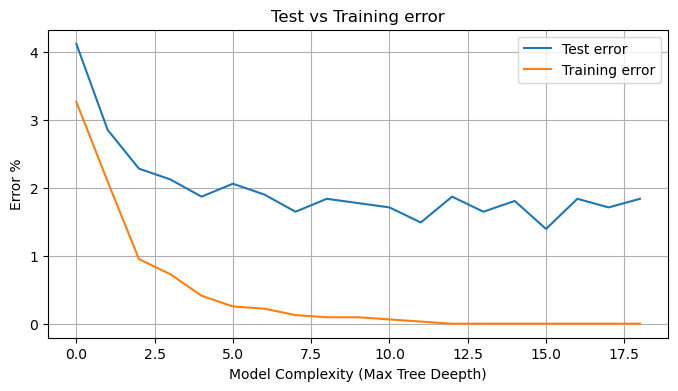

In [211]:
plt.figure(figsize = (8,4))
plt.title("Test vs Training error")
plt.plot(error_test*100, label = 'Test error')
plt.plot(error_train*100, label = 'Training error')
plt.xlabel('Model Complexity (Max Tree Deepth)')
plt.ylabel('Error %')
plt.legend()
plt.grid()

<hr>
The script below repeat the exercise above, using 10-fold cross-validation. To do this, the data set is divided into 10 random training and test folds. For each fold, a decision tree is fitted on the training set and it’s performance is evaluated on the test set. Finally, the average
classification error is computed across the 10 cross-validation folds

In [212]:

error_train = np.empty((len(tc),100))
error_test = np.empty((len(tc), 100))

kf = model_selection.KFold(n_splits = 100, shuffle  = True)


# extract training and test set for current kf fold
k=0 #Fold number
for train_index, test_index in kf.split(X):
    X_train, y_train = X[train_index,:], y[train_index]
    X_test, y_test = X[test_index,:], y[test_index]
    
   
    for i, t in enumerate(tc):
        dtc = tree.DecisionTreeClassifier(criterion='gini', max_depth=t)
        dtc.fit(X_train, y_train.ravel())
        y_test_est = dtc.predict(X_test)
        y_train_est = dtc.predict(X_train)
        missclassificaiton_rate_test = sum(y_test_est != y_test)/float(len(y_test_est))
        missclassificaiton_rate_train = sum(y_train_est != y_train)/float(len(y_train_est))
        error_train[i,k],error_test[i,k] = missclassificaiton_rate_train,missclassificaiton_rate_test
    
    k+=1 #increasig the fold number


In [213]:
error_train.shape #Error from each fold (total 10 folds) is stored column wise. Each row is a new model (20 models) 

(19, 100)

#### Visulazing the training vs test error

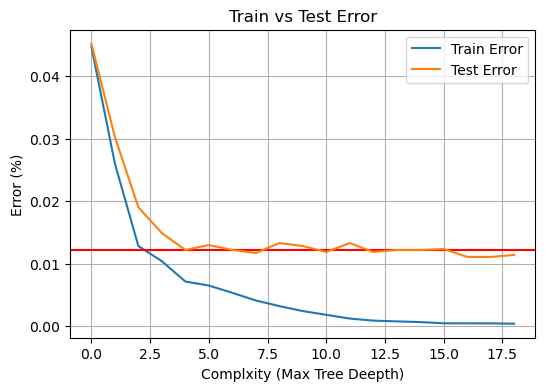

In [214]:
plt.figure(figsize = (6,4))
plt.title("Train vs Test Error")
plt.xlabel("Complxity (Max Tree Deepth)")
plt.ylabel("Error (%)")

plt.plot(error_train.mean(1),label = "Train Error") #Column wise mean => foldwise 
plt.axhline( y  =0.012209821428571428, color = 'r')
plt.plot(error_test.mean(1), label = "Test Error")
plt.legend()
plt.grid()

In [215]:
error_test.mean(1).min()

0.011101190476190475

## Part B
we consider cross-validation for variable selection and model performance evaluation in linear regression. We will try to predict the body-weight of person based on a number of body measurements using linear regression with feature subset selection. The data is a subset of the data available at http://www.sci.usq. edu.au/courses/STA3301/resources/Data/ described in [1]. To measure how well
we can predict the body-weight, we will use the squared error between the true and
estimated body-weight. In our estimation we will use two levels of cross-validation: 
1) On the outer level, we use 5-fold cross-validation to estimate the performance of our model, i.e., we compute the squared error averaged over 5 test sets.
2) On the inner level, we use 10-fold cross-validation to perform sequential feature selection

#### References
[1] Grete Heinz, Louis J Peterson, Roger W Johnson, and Carter J Kerk. Exploring
relationships in body dimensions. Journal of Statistics Education, 11(2), 2003.

#### Ímporting Libraries 

In [216]:
from toolbox_02450 import feature_selector_lr, bmplot
import sklearn.linear_model as lm

#### Loading the mat data and extracting relevent variables

In [217]:
mat_data_body = sp.loadmat('E:/DTU/1st Semester/ML & DM/02450Toolbox_Python/02450Toolbox_Python/Data/body.mat')

In [218]:
#Extracting X and y:
X = mat_data_body['X']
y = mat_data_body['y'].squeeze()
print(X.shape)
print(y.shape)
#Extracting attributeNames:
attributeNames = [name[0] for name in mat_data_body['attributeNames'][0]]
M,N = X.shape

(30, 23)
(30,)


#### Cross Validation 

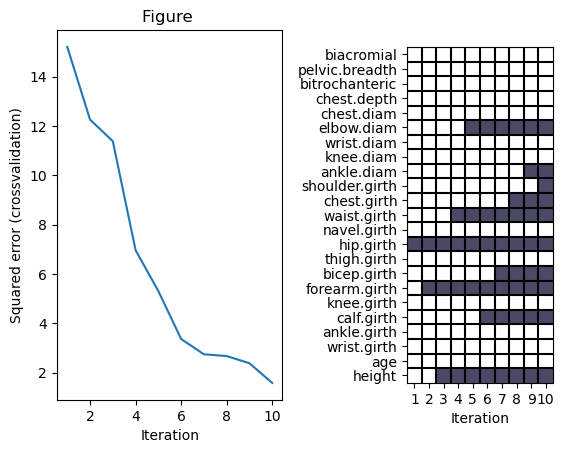

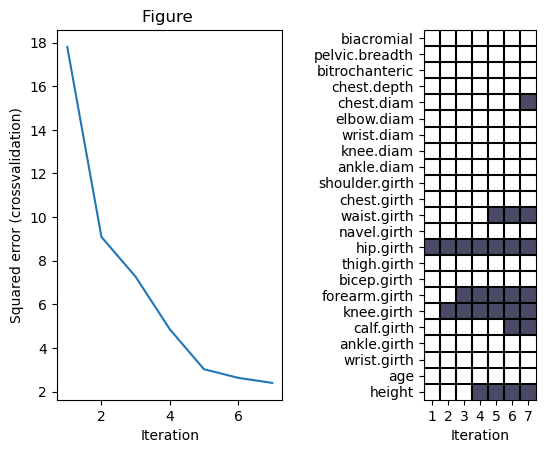

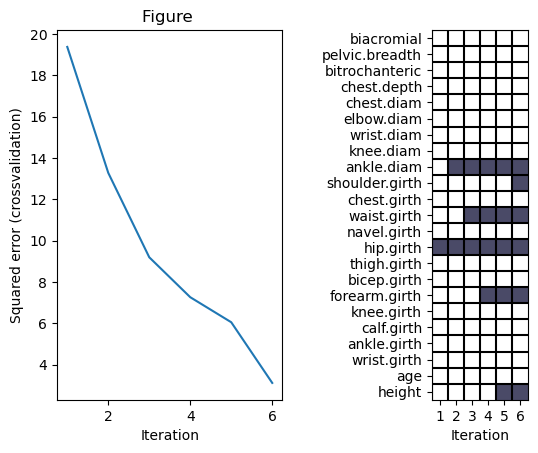

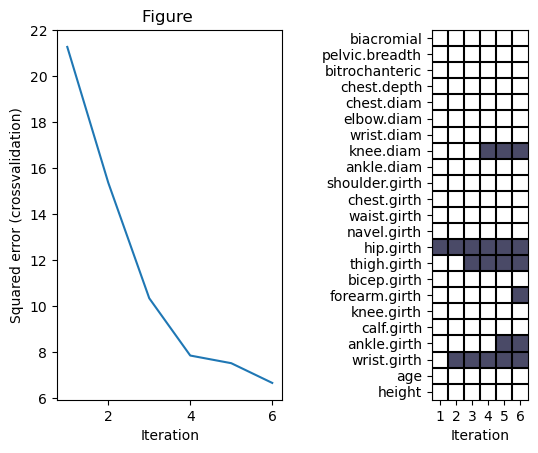

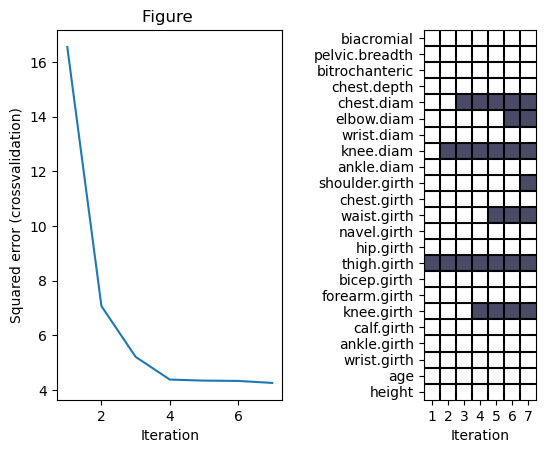

In [219]:
# Create crossvalidation partition for evaluation
K=5 # split number
kf = model_selection.KFold(n_splits = K, shuffle = True) #Outer 5-Fold cross-validation

# Initialize variables
Features = np.zeros((M,K))
Error_train = np.empty((K,1))
Error_test = np.empty((K,1))
Error_train_fs = np.empty((K,1))
Error_test_fs = np.empty((K,1))
Error_train_nofeatures = np.empty((K,1))
Error_test_nofeatures = np.empty((K,1))

k=0
for train_index, test_index in kf.split(X):
    X_train, y_train = X[train_index,:], y[train_index]
    X_test, y_test = X[test_index,:], y[test_index]
    internal_cross_validation  = 10
    
     
    # Compute squared error without using the input data at all for each fold
    Error_train_nofeatures[k] = np.square(X_train - y_train.mean()).sum()/len(y_train)
    Error_test_nofeatures[k] = np.square(X_test - y_test.mean()).sum()/len(y_test)
    
    # Compute squared error with all features selected (no feature selection)
    m = lm.LinearRegression(fit_intercept=True).fit(X_train, y_train)
    Error_train[k] = np.square(y_train-m.predict(X_train)).sum()/y_train.shape[0]
    Error_test[k] = np.square(y_test-m.predict(X_test)).sum()/y_test.shape[0]
    
    # Compute squared error with feature subset selection
    textout = ''
    selected_features, features_record, loss_record = feature_selector_lr(X_train, y_train, internal_cross_validation,display=textout)
    
    Features[selected_features,k] = 1
    # .. alternatively you could use module sklearn.feature_selection
    if len(selected_features) == 0:
        print('No features were selected, i.e. the data (X) in the fold cannot describe the outcomes (y).' )
    else:
        m = lm.LinearRegression(fit_intercept=True).fit(X_train[:,selected_features], y_train)
        Error_train_fs[k] = np.square(y_train-m.predict(X_train[:,selected_features])).sum()/y_train.shape[0]
        Error_test_fs[k] = np.square(y_test-m.predict(X_test[:,selected_features])).sum()/y_test.shape[0]
        
   
    plt.figure(k)
    plt.subplot(1,2,1)
    plt.title("Figure ")
    plt.plot(range(1,len(loss_record)), loss_record[1:])
    plt.xlabel('Iteration')
    plt.ylabel('Squared error (crossvalidation)')  
    
    plt.subplot(1,3,3)
    bmplot(attributeNames, range(1,features_record.shape[1]), -features_record[:,1:])
    plt.clim(-1.5,0)
    plt.xlabel('Iteration')
        
    k = k+1    

Text(0, 0.5, 'Attribute')

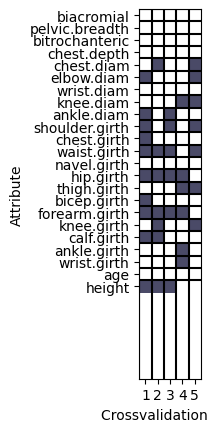

In [220]:
plt.figure(k)
plt.subplot(1,3,2)
bmplot(attributeNames, range(1,Features.shape[1]+1), -Features)
plt.clim(-1.5,0)
plt.xlabel('Crossvalidation fold')
plt.ylabel('Attribute')

In [221]:
# Display results
print('\n')
print('Linear regression without feature selection:\n')
print('- Training error: {0}'.format(Error_train.mean()))
print('- Test error:     {0}'.format(Error_test.mean()))
print('- R^2 train:     {0}'.format((Error_train_nofeatures.sum()-Error_train.sum())/Error_train_nofeatures.sum()))
print('- R^2 test:     {0}'.format((Error_test_nofeatures.sum()-Error_test.sum())/Error_test_nofeatures.sum()))
print('Linear regression with feature selection:\n')
print('- Training error: {0}'.format(Error_train_fs.mean()))
print('- Test error:     {0}'.format(Error_test_fs.mean()))
print('- R^2 train:     {0}'.format((Error_train_nofeatures.sum()-Error_train_fs.sum())/Error_train_nofeatures.sum()))
print('- R^2 test:     {0}'.format((Error_test_nofeatures.sum()-Error_test_fs.sum())/Error_test_nofeatures.sum()))



Linear regression without feature selection:

- Training error: 2.978402197461646e-26
- Test error:     3138.8162995419716
- R^2 train:     1.0
- R^2 test:     0.9448039787973058
Linear regression with feature selection:

- Training error: 2.2484275201095283
- Test error:     7.860150559661366
- R^2 train:     0.9999602723650036
- R^2 test:     0.9998617794112351


C:\Users\zhasa\AppData\Local\Temp\ipykernel_10140\2752091074.py:18: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, int( np.ceil(len(ff)/2)), i+1)


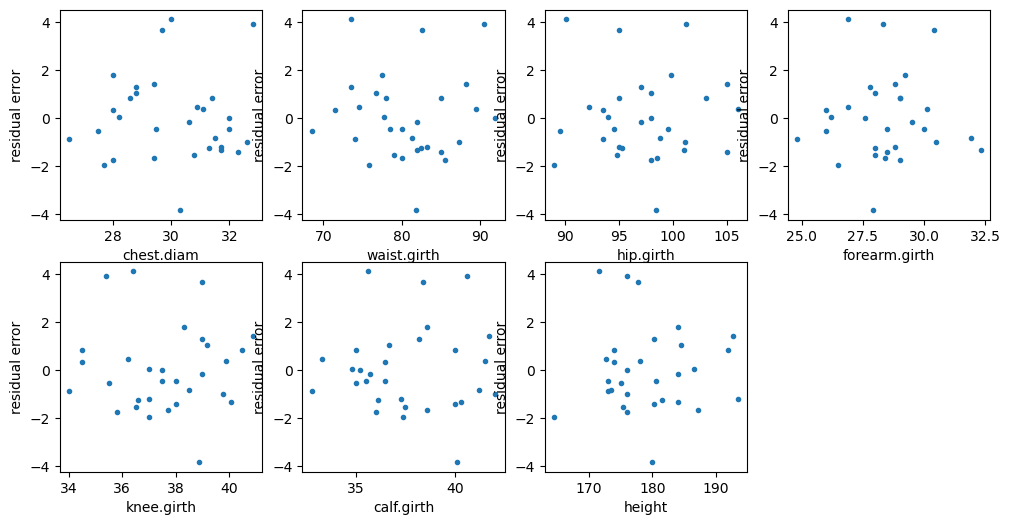

In [222]:
# Inspect selected feature coefficients effect on the entire dataset and
# plot the fitted model residual error as function of each attribute to
# inspect for systematic structure in the residual

f=2 # cross-validation fold to inspect
ff=Features[:,f-1].nonzero()[0]
if len(ff) == 0:
    print('\nNo features were selected, i.e. the data (X) in the fold cannot describe the outcomes (y).' )
else:
    m = lm.LinearRegression(fit_intercept=True).fit(X[:,ff], y)
    
    y_est= m.predict(X[:,ff])
    residual=y-y_est
    
    plt.figure(k+1, figsize=(12,6))
    plt.title('Residual error vs. Attributes for features selected in cross-validation fold {0}'.format(f))
    for i in range(0,len(ff)):
       plt.subplot(2, int( np.ceil(len(ff)/2)), i+1)
       plt.plot(X[:,ff[i]],residual,'.')
       plt.xlabel(attributeNames[ff[i]])
       plt.ylabel('residual error')

## Part C:

For each of the four synthetic datasets, we do the following. 
1. Load the dataset into Python and examine it by making a scatter plot. 
2. Classify the test data X_test using a k-nearest neighbor classifier. 
3. Choose a distance measure (consider the following distance measures: euclidean, cityblock). 
4. Choose a suitable number of neighbors.
5. Examine the accuracy and error rate.

Then we try to answer the following questions:
1. Which distance measures worked best for the four problems? Can you explain why? 
2. How many neighbors were needed for the four problems?
3. Can you give an example of when it would be good to use a large/small number of neighbors? Consider e.g. when clusters are well separated versus when they are overlapping.


#### Importing Libraries

In [223]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

#### Loading the mat data and extracting variable of interest

In [272]:
#Loading the dataset
mat_data_s = sp.loadmat('E:/DTU/1st Semester/ML & DM/02450Toolbox_Python/02450Toolbox_Python/Data/synth3.mat')

#Here change the dataset from "synth1" <--- to 2, 3 or 4

In [273]:
attributeNames = [name[0] for name in mat_data_s['attributeNames'].squeeze()]
classNames = [name[0][0] for name in mat_data_s['classNames']]

#X and y dataset
X = mat_data_s['X']
y = mat_data_s['y'].squeeze()

#Train and test datasets
X_train = mat_data_s['X_train']
y_train = mat_data_s['y_train'].squeeze()
X_test = mat_data_s['X_test']
y_test = mat_data_s['y_test'].squeeze()


M,N = X.shape
C = len(classNames)
classNames

['Class 1', 'Class 2', 'Class 3', 'Class 4']

#### Examine the dataset by making a scatter plot

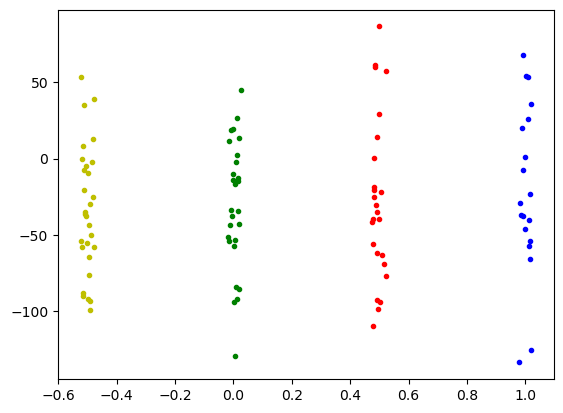

In [226]:
# Plot the training data points (color-coded) and test data points.
plt.figure(1)
styles = ['.b', '.r', '.g', '.y']
for c in range(C):
    class_mask = (y_train==c)
    plt.plot(X_train[class_mask,0], X_train[class_mask,1], styles[c])

#### Classify the test data X_test using a k-nearest neighbor classifier

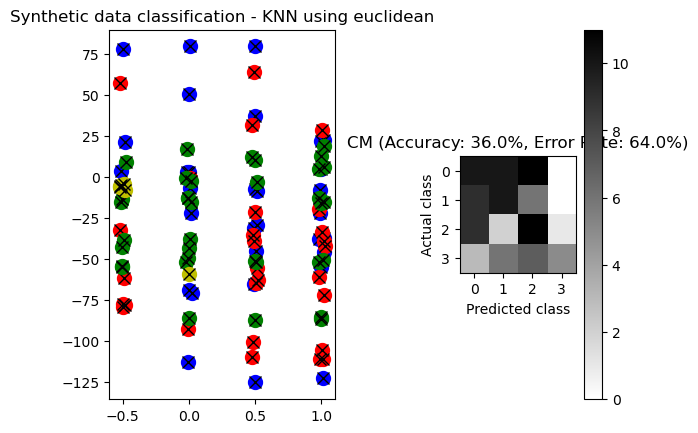

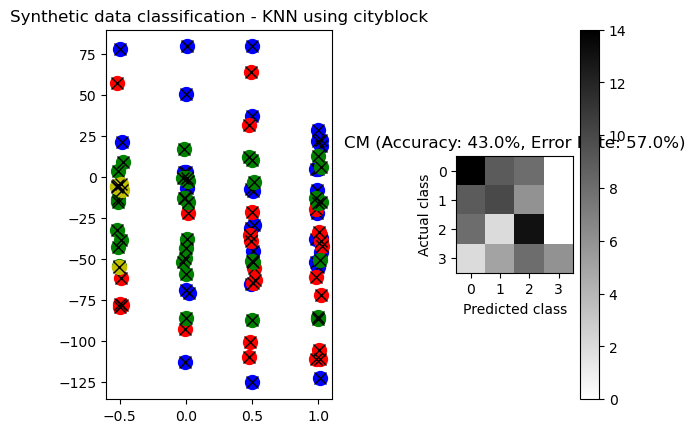

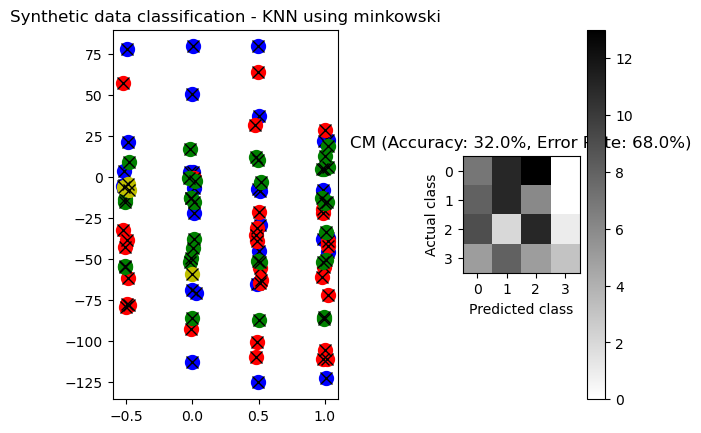

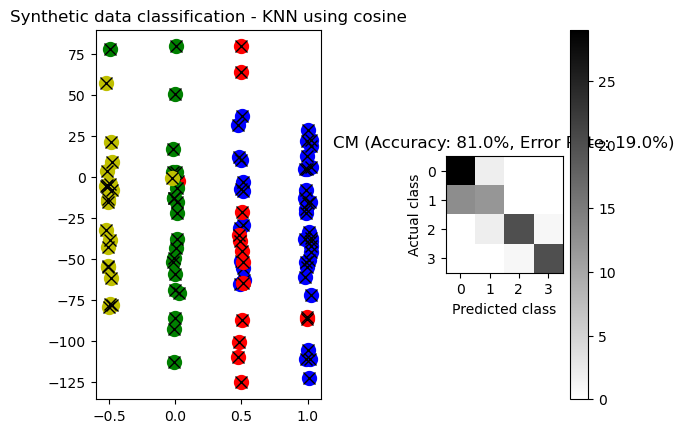

In [227]:
#Setting parameters for KNeighborsClassifier


k = 2 # K-nearest neighbors

# pfloat, default=2 Power parameter for the Minkowski metric. 
#When p = 1, this is equivalent to using manhattan_distance (l1), 
#and euclidean_distance (l2) for p = 2. 
#For arbitrary p, minkowski_distance (l_p) is used. (Reference: sklearn.neighbors.KNeighborsClassifier webpage)
dist = [2,1,10, 2]

metrics = ['euclidean','cityblock','minkowski', 'cosine']
metric_param = {}

for i in range(len(metrics)):
    #Build the model
    knclassifier = KNeighborsClassifier(n_neighbors = k, p = dist[i], metric = metrics[i], metric_params = metric_param )

    #Train the model
    knclassifier.fit(X_train, y_train)
    #Classification on the test data
    y_classified = knclassifier.predict(X_test)

    #plot the classification result
    
    plt.figure(i)
    plt.subplot(1,2,1)
    plt.title('Synthetic data classification - KNN using {0}'.format(metrics[i]))

    # Plot the classfication results
    styles = ['ob', 'or', 'og', 'oy']
    for c in range(C):
        class_mask = (y_classified==c)
        plt.plot(X_test[class_mask,0], X_test[class_mask,1], styles[c], markersize=10)
        plt.plot(X_test[class_mask,0], X_test[class_mask,1], 'kx', markersize=8)


    # Compute and plot confusion matrix
    cm = confusion_matrix(y_test, y_classified);
    accuracy = 100*cm.diagonal().sum()/cm.sum()
    error_rate = 100-accuracy #error rate = 100% - accurecy percentage

    #plt.figure(i)
    plt.subplot(1,3,3)
    plt.imshow(cm, cmap='binary', interpolation='None');
    plt.colorbar()
    plt.xticks(range(C))
    plt.yticks(range(C));
    plt.xlabel('Predicted class')
    plt.ylabel('Actual class');
    plt.title('CM (Accuracy: {0}%, Error Rate: {1}%)'.format(accuracy, error_rate))
    c=c+1

See alos: <hr>
1. https://medium.com/analytics-vidhya/what-is-a-confusion-matrix-d1c0f8feda5 (Confusion Matrix)
2. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html (sklearn.KNeighborsClassifier)

Explanation:
1. For synth1 k = 5 and Minkowski metric is a good choice. 
2. 

## Part D

In general we can use cross-validation to select the optimal distance metric and
number of nearest neighbors k although this can be computationally expensive. We
will use the Iris data , and attempt to
classify the Iris flowers using KNN.

The script loads the Iris data into Python.
Explain how the script uses leave-one-out crossvalidation to estimate the
number of neighbors, k, for the k-nearest neighbors classifier and plots
the crossvalidated average classification error as a function of k for k =
1, . . . , 40.

#### Importing Libraries

In [228]:
import pandas as pd
from sklearn import model_selection

#### Loading the dataset into a dataframe and extracting variables

In [229]:
df = pd.read_csv("E:/DTU/1st Semester/ML & DM/02450Toolbox_Python/02450Toolbox_Python/Data/iris.csv")
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Preparing X and y

In [255]:
columns = df.columns
attributeNames = columns[0:4]
classLabels = np.asarray(df[columns[4:5]]).squeeze()
classNames = df['Type'].unique()

#X and y creation
X = df[attributeNames]
X = np.asarray(X)

classDict = dict(zip(classNames,range(len(classNames))))
y = np.array([classDict[cl] for cl in classLabels])

N,M = X.shape

In [270]:
# Maximum number of neighbors
L=40

kf = model_selection.LeaveOneOut()
errors = np.zeros((N,L))
i=0
for train_index, test_index in kf.split(X):
    #print('Crossvalidation fold: {0}/{1}'.format(i+1,N))    
    
    # extract training and test set for current CV fold
    X_train = X[train_index,:]
    y_train = y[train_index]
    X_test = X[test_index,:]
    y_test = y[test_index]

    # Fit classifier and classify the test points (consider 1 to 40 neighbors)
    for l in range(1,L+1):
        knn = KNeighborsClassifier(n_neighbors=l);
        knn.fit(X_train, y_train);
        y_predicted = knn.predict(X_test);
        errors[i,l-1] = np.sum(y_predicted[0]!=y_test[0])

    i+=1

#### Visualization of error

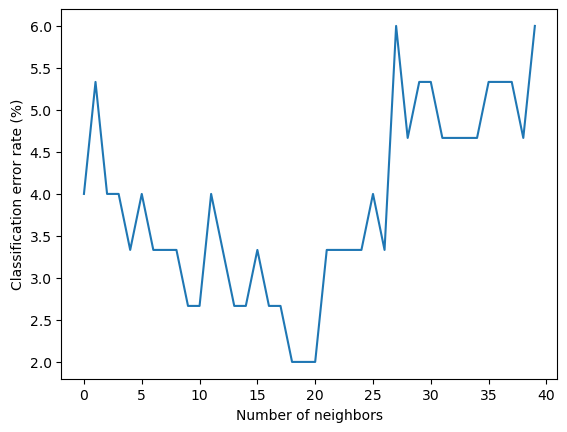

In [271]:
# Plot the classification error rate
plt.figure()
plt.plot(100*sum(errors,0)/N)
plt.xlabel('Number of neighbors')
plt.ylabel('Classification error rate (%)')
plt.show()

The data illustrates an initial decreasing trend in error rate as the number of neighbors grows. However, this decline is followed by a sudden and erratic increase in error rates as the number of neighbors continues to rise. It's clear from the figure that a range of approximately 17 to 20 neighbors yields the lowest error rates for this specific problem.

Acknowledgement: These codes and some of the markdowns are inspired from the course content provided by DTU Compute.